## Import

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) 

## Data Load

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
train_df["X_1"].value_counts()

2.0      297
1.0       41
4.0        3
6.0        2
8.0        1
103.0      1
3.0        1
7.0        1
40.0       1
21.0       1
Name: X_1, dtype: int64

In [ ]:
train_df.describe()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5af3684340>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

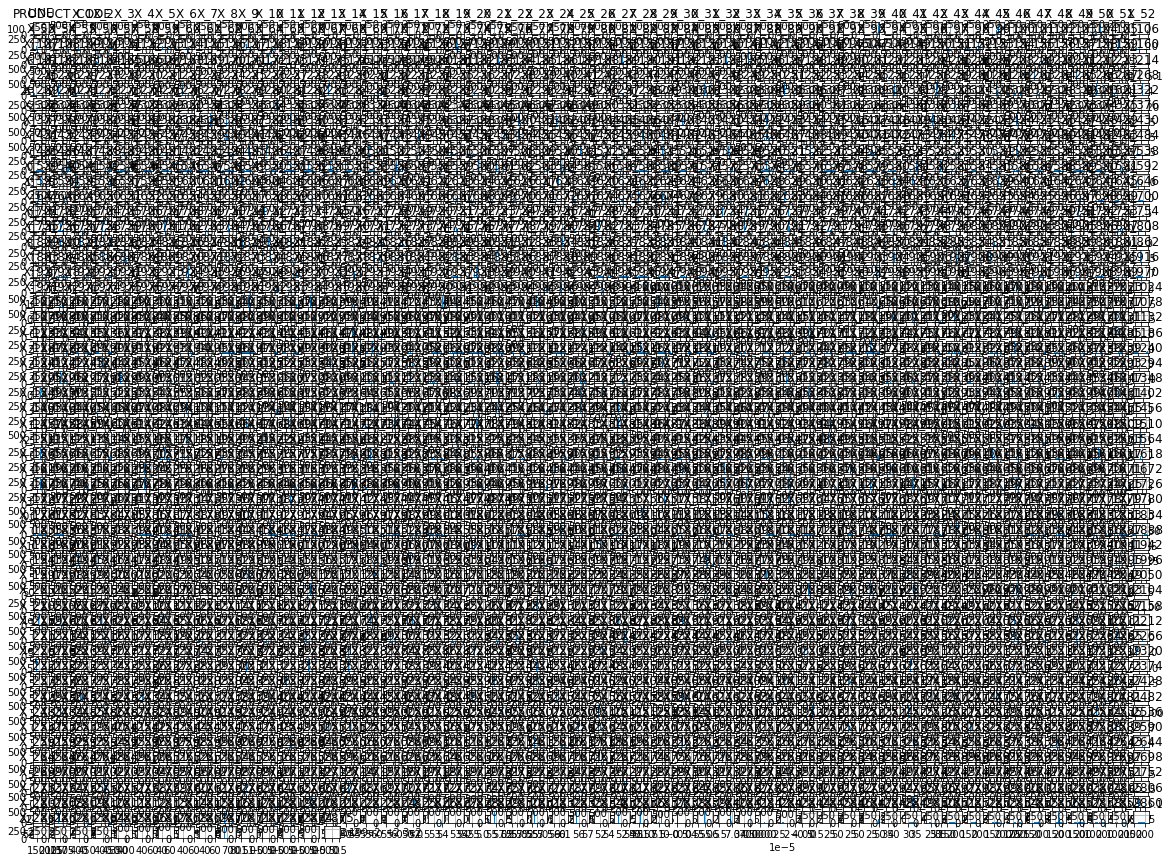

In [ ]:
train_x.hist(bins=50, figsize=(20,15))

In [ ]:
train_df.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [ ]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

*TIMESTAMP 는 필요 없는 column?*

## Data Pre-processing

In [ ]:
#train_x = train_x.fillna(0)
#test_x = test_x.fillna(0)

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2875), object(2)
memory usage: 13.1+ MB


In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2875), object(2)
memory usage: 6.8+ MB


In [ ]:
# qualitative to quantitative
# one-hot encoding
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2875), int64(2)
memory usage: 13.1 MB


In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2875), int64(2)
memory usage: 6.8 MB


In [ ]:
train_x.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0
1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_x.columns

Index(['LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8',
       ...
       'X_2866', 'X_2867', 'X_2868', 'X_2869', 'X_2870', 'X_2871', 'X_2872',
       'X_2873', 'X_2874', 'X_2875'],
      dtype='object', length=2877)

In [ ]:
#결측치 평균 (column이 줄어드는 문제)

import pandas as pd
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="mean")
#imputer 생성
train_x = pd.DataFrame(my_imputer.fit_transform(train_x))
test_x = pd.DataFrame(my_imputer.fit_transform(test_x))

In [ ]:
import math
mean = 0

for column in train_x:
  if math.isnan(train_x[column].mean()):
    mean = 0
  else :
    mean = train_x[column].mean()
  train_x[column] = train_x[column].fillna(mean)

In [ ]:
import math
mean = 0

for column in test_x:
  if math.isnan(test_x[column].mean()):
    mean = 0
  else :
    mean = test_x[column].mean()
  test_x[column] = test_x[column].fillna(mean)

In [ ]:
import math

math.isnan(train_x['X_2875'].mean())

True

In [ ]:
#결측치 중간값 (column이 줄어드는 문제)

import pandas as pd
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="median")
#imputer 생성
train_x = pd.DataFrame(my_imputer.fit_transform(train_x))
test_x = pd.DataFrame(my_imputer.fit_transform(test_x))

In [ ]:
import math
median = 0

for column in train_x:
  if math.isnan(train_x[column].median()):
    median = 0
  else :
    median = train_x[column].median()
  train_x[column] = train_x[column].fillna(median)

In [ ]:
import math
median = 0

for column in test_x:
  if math.isnan(test_x[column].median()):
    median = 0
  else :
    median = test_x[column].median()
  test_x[column] = test_x[column].fillna(median)

In [ ]:
#결측치 최빈값 (column이 줄어드는 문제)

import pandas as pd
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="most_frequent")
#imputer 생성
train_x = pd.DataFrame(my_imputer.fit_transform(train_x))
test_x = pd.DataFrame(my_imputer.fit_transform(test_x))

In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2875), int64(2)
memory usage: 6.8 MB


In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2875), int64(2)
memory usage: 13.1 MB


In [ ]:
train_x.isnull().sum()

LINE            0
PRODUCT_CODE    0
X_1             0
X_2             0
X_3             0
               ..
X_2871          0
X_2872          0
X_2873          0
X_2874          0
X_2875          0
Length: 2877, dtype: int64

## Classification Model Fit

In [ ]:
RF = RandomForestClassifier(random_state=37).fit(train_x, train_y)
print('Done.')

Done.


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
for max_depth in range(3,30):
  model = DecisionTreeClassifier(max_depth = max_depth, random_state=37)
  y_predict = model.fit(X_train, y_train).predict(X_test)
  score = accuracy_score(y_test, y_predict) * 100
  print(max_depth, score)

## Inference

In [ ]:
preds = RF.predict(test_x)
print('Done.')

Done.


## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = preds

In [ ]:
submit.to_csv('./submission3.csv', index=False)